In [ ]:
from bs4 import BeautifulSoup
import urllib.request as req
import os.path

url = "http://www.city.yokohama.lg.jp/somu/org/kikikanri/data/shelter.xml"
savename = "shelter.xml"
if not os.path.exists(savename):
    req.urlretrieve(url, savename)

xml = open(savename, "r", encoding="utf-8").read()
soup = BeautifulSoup(xml, 'html.parser')

info = {}
for i in soup.find_all("shelter"):
    name = i.find('name').string
    ward = i.find('ward').string
    addr = i.find('address').string
    note = i.find('notes').string
    if not (ward in info):
        info[ward] = []
    info[ward].append(name)

for ward in info.keys():
    print("+", ward)
    for name in info[ward]:
        print("|-", name)

In [ ]:
import urllib.request as req
import os.path, random
import json

url = "http://api.aoikujira.com/hyakunin/get.php?fmt=json"
savename = "hyakunin.json"
if not os.path.exists(savename):
    req.urlretrieve(url, savename)

data = json.load(open(savename, "r", encoding="utf-8"))
r = random.choice(data)
print(r['kami'], ",", r['simo'])

In [ ]:
import yaml

test = """
Date: 2018-08-27
PriceList:
    -
        item_id: 1000
        name: Banana
        color: yellow
        price: 800
    -
        item_id: 1001
        name: Orange
        color: orange
        price: 1400
    -
        item_id: 1002
        name: Apple
        color: red
        price: 2400
"""
data = yaml.load(test)
for item in data['PriceList']:
    print(item['name'],',',item['price'])


In [ ]:
import yaml

savename = "hyakunin.json"
data = json.load(open(savename, "r", encoding="utf-8"))
yaml_str = yaml.dump(data)
print(yaml_str)
print("--- --- ---")
yaml_data = yaml.load(yaml_str)
for item in yaml_data:
    print(item["kami"], ",", item['simo'])

In [ ]:
import urllib.request as request
import datetime
import json
API = "http://api.aoikujira.com/kawase/get.php?code=USD&format=json"
json_str = request.urlopen(API).read().decode("utf-8")
data = json.loads(json_str)
print("1USD="+data["JPY"]+"JPY")

t = datetime.date.today()
fname = t.strftime("%Y-%m-%d") + ".json"
with open(fname, "w", encoding="utf-8") as f:
    f.write(json_str)


In [ ]:
import codecs
import os
print(os.getcwd())
filename = "../Downloads/검색샌터_원더쇼핑 상위 검색키워드 (1).csv"
csv = codecs.open(filename, "r", "utf-8").read()

data = []
rows = csv.split("\r\n")
for row in rows:
    if row == "": continue
    cells = row.split(",")
    data.append(cells)

for c in data:
    print(c[0], c[1])

In [ ]:
import openpyxl

filename = "./20180717_지역코드맵핑_Ver 1.0.xlsx"
book = openpyxl.load_workbook(filename)
# print(book.worksheets)
sheet = book.worksheets[0]

data = []
for row in sheet.rows:
    temp = []
    for i in range(0,len(row)):
        # print(row[i].value, end=' ')
        if row[i].value: temp.append(row[i].value)
    data.append(temp)

del data[0]
data = sorted(data, key=lambda x:x[2])
for i, a in enumerate(data):
    print(i+1, a[0],a[1],a[2])

In [ ]:
import openpyxl

filename = "./20180717_지역코드맵핑_Ver 1.0.xlsx"
book = openpyxl.load_workbook(filename)

sheet = book.active
print(sheet)
sheet["A1"] = "test"
sheet["B1"] = "test"

col = sheet["B1"]
col.font = openpyxl.styles.Font(size=14,color="FF0000")
col = sheet["A1"]
col.font = openpyxl.styles.Font(size=20,color="00FF00")

filename = "./20180717_지역코드맵핑_Ver 1.0_test.xlsx"
book.save(filename)
print("ok")

In [ ]:
import pandas as pd

filename = "./20180717_지역코드맵핑_Ver 1.0.xlsx"
sheet_name = "1차완성"
book = pd.read_excel(filename, sheetname=sheet_name)

book.sort_values(by="국가코드_항공", ascending=True)
print(book)


In [ ]:
from tinydb import TinyDB, Query

filepath = "./test-tinydb.json"
db = TinyDB(filepath)

db.purge_table('fruits')

table = db.table("fruits")

table.insert({'name':'Banna', 'price':600})
table.insert({'name':'Orange', 'price':1200})
table.insert({'name':'Mango', 'price':840})

print(table.all())
Item = Query()
res = table.search(Item.name == 'Orange')
print('Orange is ', res[0]['price'])

print("800 이상 물건 :")
res = table.search(Item.price >=800)
for item in res:
    print("-", item['name'])

In [ ]:
from sklearn import svm

xor_data = [
    #P,Q,Result
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

data = []
label = []
for row in xor_data:
    p = row[0]
    q = row[1]
    r = row[2]
    data.append([p,q])
    label.append(r)

clf = svm.SVC()
clf.fit(data, label)

pre = clf.predict(data)
print("예측결과:", pre)

print(label)
ok = 0; total = 0
for idx, answer in enumerate(label):
    print(idx, answer)
    p = pre[idx]
    if p == answer: ok += 1
    total += 1
print("정답률:", ok, "/", total, "=", ok/total)

In [ ]:
# xor-tran2
import pandas as pd
from sklearn import svm, metrics

xor_input = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.loc[:, [0,1]] # data
print("xor_data:",xor_data)
xor_label = xor_df.loc[:,2] # result
print("xor_label:",xor_label)

clf = svm.SVC()
clf.fit(xor_data, xor_label)
pre = clf.predict(xor_data)

ac_score = metrics.accuracy_score(xor_label, pre)
print("정답률:", ac_score)

In [ ]:
# iris-train
from sklearn import svm, metrics
import random, re

csv = []
with open("./iris.csv", "r", encoding="utf-8") as fp:
    for line in fp:
        line = line.strip()
        cols = line.split(",")
        fn = lambda n: float(n) if re.match(r"^[0-9\.]+$", n) else n
        cols = list(map(fn, cols))
        csv.append(cols)
# print(csv)

del csv[0]
random.shuffle(csv)
total_len = len(csv)
train_len = int(total_len *2 / 3)
train_data = []
train_label = []
test_data = []
test_label = []

for i in range(total_len):
    data = csv[i][0:4]
    label = csv[i][4]
    if i < train_len:
        train_data.append(data)
        train_label.append(label)
    else:
        test_data.append(data)
        test_label.append(label)

clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

ac_score = metrics.accuracy_score(test_label, pre)
print("정답률:", ac_score)

In [ ]:
# iris-train2
import pandas as pd
from sklearn import svm, metrics, cross_validation, model_selection

csv = pd.read_csv("./iris.csv")

csv_data = csv[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
# print(csv_data)
csv_label = csv["Name"]
# print(csv_label)

# train_data, test_data, train_label, test_label = cross_validation.train_test_split(csv_data, csv_label)
train_data, test_data, train_label, test_label = model_selection.train_test_split(csv_data, csv_label)

clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

ac_score = metrics.accuracy_score(test_label, pre)
print("정답률:", ac_score)

In [ ]:
# mnist-to-csv
import struct

def to_csv(name, maxdata):
    lbl_f = open("./train-labels.idx1-ubyte", "rb")
    img_f = open("./train-images.idx3-ubyte", "rb")
    csv_f = open("./"+name+".csv", "w", encoding="utf-8")
    
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        if idx < 10:
            s = "P2 28 28 255\n"
            s += " ".join(sdata)
            iname = "./{}-{}-{}.pgm".format(name, idx, label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
    lbl_f.close()
    img_f.close()

to_csv("train-mnist-number", 1000)
to_csv("test-mnist-number", 500)
# test1 = struct.unpack(">I", b'\x00\x00\x08\x01')
# test2 = struct.unpack(">I", b'\x00\x00\xea\x60')
# print(test1,test2)
# print(hex(test2[0]))
# print(hex(test1[0]))
sdata = list(map(lambda n: str(n), b'\x00\x00\x08\x01'))
print(sdata)

In [ ]:
# mnist-train
from sklearn import model_selection, svm, metrics

def load_csv(fname):
    labels = []
    images = []
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2: continue
            labels.append(int(cols.pop(0)))
            vals = list(map(lambda n: int(n) / 256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}

data = load_csv("./train-mnist-number.csv")
test = load_csv("./test-mnist-number.csv")

clf = svm.SVC()
clf.fit(data["images"], data["labels"])

predict = clf.predict(test["images"])

ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("정답률:", ac_score)
print("Report:")
print(cl_report)

In [1]:
#lang-train

from sklearn import svm, metrics
import glob, os.path, re, json

def check_freq(fname):
    name = os.path.basename(fname)
    lang = re.match(r'^[a-z]{2,}', name).group()
#     print(lang)
    with open(fname, "r", encoding="utf-8") as f:
        text = f.read()
    text = text.lower()
    
    cnt = [0 for n in range(0,26)]
    code_a = ord("a")
    code_z = ord("z")
    
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z:
            cnt[n-code_a] += 1
    total = sum(cnt)
    freq = list(map(lambda n: n/total, cnt))
    return (freq, lang)
    
def load_files(path):
    freqs = []
    labels = []
    file_list = glob.glob(path)
#     print(file_list)
    for fname in file_list:
        r = check_freq(fname)
        freqs.append(r[0])
        labels.append(r[1])
    return {"freqs":freqs, "labels":labels}

data = load_files("./lang/train/*.txt")
test = load_files("./lang/test/*.txt")
# print(data)
with open("./lang/freq.json", "w", encoding="utf-8") as fp:
    json.dump([data, test], fp)

clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

predict = clf.predict(test["freqs"])

ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("정답률:", ac_score)
print("Report:")
print(cl_report)

정답률: 0.875
Report:
             precision    recall  f1-score   support

         en       0.67      1.00      0.80         2
         fr       1.00      1.00      1.00         2
         id       1.00      0.50      0.67         2
         tl       1.00      1.00      1.00         2

avg / total       0.92      0.88      0.87         8



         en        fr        id        tl
a  0.078620  0.076462  0.143917  0.215725
b  0.017609  0.013802  0.028470  0.022360
c  0.036143  0.035956  0.011012  0.009065
d  0.038315  0.046670  0.036799  0.015920
e  0.128073  0.149690  0.091711  0.031863
f  0.016650  0.011862  0.007415  0.003200
g  0.027052  0.012418  0.049518  0.086776
h  0.032305  0.013495  0.016180  0.017125
i  0.078720  0.074776  0.099914  0.083303
j  0.002451  0.002720  0.005221  0.001311
k  0.007166  0.001889  0.031672  0.027721
l  0.047411  0.062862  0.043160  0.048553
m  0.024146  0.032823  0.034384  0.034264
n  0.062884  0.072571  0.088489  0.125691
o  0.074376  0.058002  0.037228  0.048640
p  0.019615  0.028457  0.028619  0.031509
q  0.003208  0.006397  0.000011  0.000669
r  0.076498  0.076141  0.063212  0.024510
s  0.073799  0.078303  0.067731  0.052449
t  0.081022  0.068285  0.048595  0.051949
u  0.028900  0.051444  0.043003  0.029315
v  0.013772  0.012087  0.004532  0.002391
w  0.014435  0.003060  0.005512  0

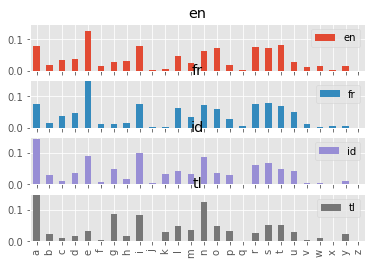

In [3]:
# lang-plot
# import matplotlib
# matplotlib.use('TkAgg')
# or 
# $echo "backend: TkAgg" >> ~/.matplotlib/matplotlibrc 
# Jupyter 서버 restart: <menu>Kernel -> Restart
# Reference
# - https://github.com/dsmbgu8/image_annotate.py/issues/4
# - https://stackoverflow.com/questions/29433824/unable-to-import-matplotlib-pyplot-as-plt-in-virtualenv
# - https://matplotlib.org/faq/usage_faq.html
import matplotlib.pyplot as plt
import pandas as pd
import json

with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    freq = json.load(fp)
    
lang_dic = {}
for i, lbl in enumerate(freq[0]["labels"]):
    fq = freq[0]["freqs"][i]
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
#     print(lang_dic)
    for idx, v in enumerate(fq):
         lang_dic[lbl][idx] = (lang_dic[lbl][idx] + v) /2
#     print(lang_dic)

asclist = [[chr(n) for n in range(97, 97+26)]]
df = pd.DataFrame(lang_dic, index=asclist)
print(df)

plt.style.use('ggplot')
df.plot(kind='bar', subplots=True, ylim=(0,0.15))
plt.savefig("lang-plot.png")
plt.show()

In [8]:
# lang-train-save
from sklearn import svm
from sklearn.externals import joblib
import json

with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    d = json.load(fp)
    data = d[0]

clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

joblib.dump(clf, "./lang/freq.pkl")
print("OK")

pkl_f = open("./lang/freq.pkl", "rb")
data = pkl_f.read()
print(data)

OK
b'\x80\x03csklearn.svm.classes\nSVC\nq\x00)\x81q\x01}q\x02(X\x17\x00\x00\x00decision_function_shapeq\x03X\x03\x00\x00\x00ovrq\x04X\x05\x00\x00\x00_implq\x05X\x05\x00\x00\x00c_svcq\x06X\x06\x00\x00\x00kernelq\x07X\x03\x00\x00\x00rbfq\x08X\x06\x00\x00\x00degreeq\tK\x03X\x05\x00\x00\x00gammaq\nX\x04\x00\x00\x00autoq\x0bX\x05\x00\x00\x00coef0q\x0cG\x00\x00\x00\x00\x00\x00\x00\x00X\x03\x00\x00\x00tolq\rG?PbM\xd2\xf1\xa9\xfcX\x01\x00\x00\x00Cq\x0eG?\xf0\x00\x00\x00\x00\x00\x00X\x02\x00\x00\x00nuq\x0fG\x00\x00\x00\x00\x00\x00\x00\x00X\x07\x00\x00\x00epsilonq\x10G\x00\x00\x00\x00\x00\x00\x00\x00X\t\x00\x00\x00shrinkingq\x11\x88X\x0b\x00\x00\x00probabilityq\x12\x89X\n\x00\x00\x00cache_sizeq\x13K\xc8X\x0c\x00\x00\x00class_weightq\x14NX\x07\x00\x00\x00verboseq\x15\x89X\x08\x00\x00\x00max_iterq\x16J\xff\xff\xff\xffX\x0c\x00\x00\x00random_stateq\x17NX\x07\x00\x00\x00_sparseq\x18\x89X\r\x00\x00\x00class_weight_q\x19csklearn.externals.joblib.numpy_pickle\nNumpyArrayWrapper\nq\x1a)\x81q\x1b}q\x1c(X

In [ ]:
# lang-webapp
# test 방법 
# + <root>
# |--+ <cgi-bin>
#    |-- lang-webapp.py
# $chmod +x lang-webapp.py
# $python -m http.server --cgi 8080
# --------------------

#!/usr/bin/env python3
import cgi, os.path
from sklearn.externals import joblib

pklfile = os.path.dirname(__file__) + "/../lang/freq.pkl"
clf = joblib.load(pklfile)

def show_form(text, msg=""):
    print("Content-Type: text/html; charset=utf-8")
    print("")
    print("""
    <html><body><form>
    <textarea name="text" rows="8" cols="40">{0}</textarea>
    <p><input type="submit" value=" 판정 "></p>
    <p>{1}</p>
    </form></body></html>
    """.format(cgi.escape(text), msg))

def detect_lang(text):
    text = text.lower()
    code_a, code_z = (ord('a'), ord('z'))
    cnt = [0 for i in range(26)]
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z: cnt[n-code_a] += 1
    total = sum(cnt)
    if total == 0: return "입력이 없습니다."
    freq = list(map(lambda n: n / total, cnt))
    
    res = clf.predict([freq])
    lang_dic = {"en":"영어", "fr":"프랑스어", "id":"인도네시아어", "tl":"타갈로그어"}
    return lang_dic[res[0]]

form = cgi.FieldStorage()
text = form.getvalue("text", default="")
msg = ""
if text != "":
    lang = detect_lang(text)
    msg = "판정결과: " + lang

show_form(text, msg)

In [14]:
# bmi-create
import random

def calc_bmi(h,w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return "thin"
    if bmi < 25: return "normal"
    return "fat"

fp = open("./bmi.csv", "w", encoding="utf-8")
fp.write("height,weight,label\r\n")
cnt = {"thin":0, "normal":0, "fat":0}
for i in range(20000):
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    label = calc_bmi(h,w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h,w,label))
fp.close()
print("OK,", cnt)

OK, {'thin': 6381, 'normal': 5883, 'fat': 7736}


In [18]:
# bmi0test
from sklearn import svm, model_selection, metrics
import matplotlib.pyplot as plt
import pandas as pd

tbl = pd.read_csv("./bmi.csv")
# print(tbl)
label = tbl["label"]
w = tbl["weight"] / 100 #100으로 normalize
h = tbl["height"] / 200 #200으로 Normalize
wh = pd.concat([w,h], axis=1)
# print(wh)

data_train, data_test, label_train, label_test = model_selection.train_test_split(wh, label)

clf = svm.SVC()
clf.fit(data_train, label_train)

predict = clf.predict(data_test)

ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률:", ac_score)
print("Report=")
print(cl_report)

정답률: 0.9872
Report=
             precision    recall  f1-score   support

        fat       1.00      0.99      0.99      1881
     normal       0.97      0.99      0.98      1525
       thin       1.00      0.98      0.99      1594

avg / total       0.99      0.99      0.99      5000



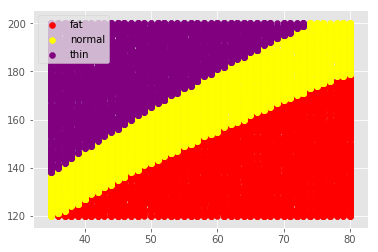

In [19]:
# bmi-plot
import matplotlib.pyplot as plt
import pandas as pd

tbl = pd.read_csv("./bmi.csv", index_col=2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"], b["height"], c=color, label=lbl)

scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")

ax.legend()
plt.savefig("big-test.png")
plt.show()

In [21]:
# mushroom-download
import urllib.request as req
local = "./mushroom.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, local)
print("ok")

ok


In [31]:
# mushroom-train
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, metrics

mr = pd.read_csv("./mushroom.csv", header=None)

label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(row.loc[0])
    row_data = list(map(lambda n: ord(n), row.loc[1:]))
#     row_data = []
#     for v in row.loc[1:]:
#         row_data.append(ord(v))
    data.append(row_data)
# print(data)

data_train, data_test, label_train, label_test = model_selection.train_test_split(data, label)

clf = RandomForestClassifier()
clf.fit(data_train, label_train)

predict = clf.predict(data_test)

ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률:", ac_score)
print("Report:")
print(cl_report)

정답률: 1.0
Report:
             precision    recall  f1-score   support

          e       1.00      1.00      1.00      1045
          p       1.00      1.00      1.00       986

avg / total       1.00      1.00      1.00      2031



In [45]:
# mushroom-train
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, metrics

mr = pd.read_csv("./mushroom.csv", header=None)

label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(row.loc[0])
    exdata = []
#     print(row.loc[1:])
    for col, v in enumerate(row.loc[1:]):
        if row_index == 0:
            attr = {"dic": {}, "cnt": 0}
            attr_list.append(attr)
        else:
            attr = attr_list[col]
        
        d = [0]*12
#         print(d)
#         print(v,attr)
        if v in attr["dic"]:
            idx = attr["dic"][v]
        else:
            idx = attr["cnt"]
            attr["dic"][v] = idx
            attr["cnt"] += 1
        d[idx] = 1
        exdata += d
    data.append(exdata)

data_train, data_test, label_train, label_test = model_selection.train_test_split(data, label)

clf = RandomForestClassifier()
clf.fit(data_train, label_train)
predict = clf.predict(data_test)

ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률: ", ac_score)
print("Report: ")
print(cl_report)

정답률:  1.0
Report: 
             precision    recall  f1-score   support

          e       1.00      1.00      1.00      1075
          p       1.00      1.00      1.00       956

avg / total       1.00      1.00      1.00      2031



In [5]:
# cross-iris
from sklearn import svm, metrics
import  random, re

lines = open("./iris.csv", "r", encoding="utf-8").read().split("\n")
f_tonum = lambda n: float(n) if re.match(r'^[0-9\.]+$', n) else n
f_cols = lambda li: list(map(f_tonum, li.strip().split(',')))
csv = list(map(f_cols, lines))
del csv[0]
random.shuffle(csv)

K = 5
csvk = [[] for i in range(K)]
for i in range(len(csv)):
    csvk[i % K].append(csv[i])

def split_data_label(rows):
    data = []; label = []
    for row in rows:
        data.append(row[0:4])
        label.append(row[4])
    return (data, label)

def calc_score(test, train):
    test_f, test_l = split_data_label(test)
    train_f, train_l = split_data_label(train)
    clf = svm.SVC()
    clf.fit(train_f, train_l)
    pre = clf.predict(test_f)
    return metrics.accuracy_score(test_l, pre)

score_list = []
for testc in csvk:
    trainc = []
    for i in csvk:
        if i != testc: trainc += i
    sc = calc_score(testc, trainc)
    score_list.append(sc)

print("각 정답률=", score_list)
print("평균정답률=", sum(score_list) / len(score_list))

각 정답률= [0.9333333333333333, 1.0, 1.0, 0.9666666666666667, 0.9333333333333333]
평균정답률= 0.9666666666666668


In [9]:
# cross-iris2
import pandas as pd
from sklearn import svm, metrics, model_selection
import random, re

csv = pd.read_csv("./iris.csv")

data = csv[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
label = csv["Name"]

clf = svm.SVC()
scores = model_selection.cross_val_score(clf, data, label, cv=5)
print("각 정답률=", scores)
print("평균정답률=", scores.mean())

각 정답률= [0.96666667 1.         0.96666667 0.96666667 1.        ]
평균정답률= 0.9800000000000001


In [20]:
import pandas as pd
from sklearn import model_selection, svm, metrics
from sklearn.grid_search import GridSearchCV

train_csv = pd.read_csv("./train-mnist-number.csv")
test_csv = pd.read_csv("./test-mnist-number.csv")

train_label = train_csv.iloc[:,0]
train_data = train_csv.iloc[:, 1:577]

test_label = test_csv.iloc[:,0]
test_data = test_csv.iloc[:, 1:577]
print("학습 데이터 수 =", len(train_label))

params = [
    {"C":[1,10,100,1000], "kernel":["linear"]},
    {"C":[1,10,100,1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]}
]

clf = GridSearchCV(svm.SVC(), params, n_jobs=-1)
clf.fit(train_data, train_label)
print("학습기=", clf.best_estimator_)

pre = clf.predict(test_data)
ac_score = metrics.accuracy_score(test_label, pre)
print("정답률=", ac_score)

학습 데이터 수 = 1000
학습기= SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
정답률= 1.0


In [23]:
# pip install --upgrade tensorflow 
# 이런 오류가 난다면 : RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
# 해결 방법 :
# --> import tensorflow aspip install --ignore-installed --upgrade "https://github.com/lakshayg/tensorflow-build/raw/master/tensorflow-1.4.0-cp36-cp36m-macosx_10_12_x86_64.whl" 
# --> pip install --upgrade https://github.com/lakshayg/tensorflow-build/raw/master/tensorflow-1.4.1-cp36-cp36m-macosx_10_13_x86_64.whl
import tensorflow as tf
sess = tf.Session()
hello = tf.constant('Hello')
sess.run(hello)

b'Hello'

In [24]:
# ch5. calc1
import tensorflow as tf

a = tf.constant(1234)
b = tf.constant(5000)

add_op = a+b
sess = tf.Session()
result = sess.run(add_op)
print(result)

6234


In [25]:
# ch5. calc2
import tensorflow as tf

a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(4)

calc1_op = a + b * c
calc2_op = (a+b) * c

sess = tf.Session()
res1 = sess.run(calc1_op)
print(res1)
res2 = sess.run(calc2_op)
print(res2)

14
20


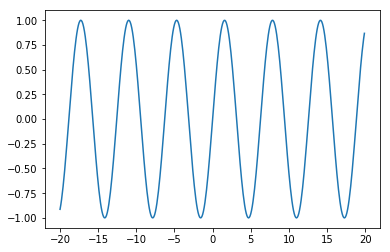

In [27]:
# test
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-20,20,0.1)
y = np.sin(x)
plt.plot(x,y)

In [31]:
#ch5. var
import tensorflow as tf

a = tf.constant(120, name="a")
b = tf.constant(130, name="b")
c = tf.constant(140, name="c")

v = tf.Variable(0, name="v")

calc_op = a + b + c
assign_op = tf.assign(v, calc_op)

sess = tf.Session()
sess.run(assign_op)
print(assign_op)

print(sess.run(v))

Tensor("Assign_3:0", shape=(), dtype=int32_ref)
390


In [33]:
# ch5. placeholder
import tensorflow as tf

a = tf.placeholder(tf.int32, [3])

b = tf.constant(2)
x2_op = a * b

sess = tf.Session()
r1 = sess.run(x2_op, feed_dict={a:[1, 2, 3]})
print(r1)

r2 = sess.run(x2_op, feed_dict={a:[10,20,30]})
print(r2)

[2 4 6]
[20 40 60]


In [37]:
# ch5. placeholder2

import tensorflow as tf

a = tf.placeholder(tf.int32, [None])

b = tf.constant(10)
x10_op = a * b
x10_op1 = a1 * b

sess = tf.Session()

r1 = sess.run(x10_op, feed_dict={a:[1,2,3,4,5]})
print(r1)

r2 = sess.run(x10_op, feed_dict={a:[10,20]})
print(r2)


[10 20 30 40 50]
[100 200]


In [9]:
# ch5. bmi

import pandas as pd
import numpy as np
import tensorflow as tf

csv = pd.read_csv("./bmi.csv")
csv["height"] = csv["height"] / 200
csv["weight"] = csv["weight"] / 100

bclass = {"thin": [1,0,0], "normal": [0,1,0], "fat": [0,0,1]}
# 람다를 이용하여 배열의 해당 컬럼 데이터에 대해 일괄 변경 하는 예제
csv["label_pat"] = csv["label"].apply(lambda x: np.array(bclass[x]))

test_csv = csv[15000:20000]
test_pat = test_csv[["weight", "height"]]
test_ans = list(test_csv["label_pat"])

x = tf.placeholder(tf.float32, [None, 2])
y_ = tf.placeholder(tf.float32, [None, 3])

W = tf.Variable(tf.zeros([2,3]))
b = tf.Variable(tf.zeros([3]))
#softmax 회기 
y = tf.nn.softmax(tf.matmul(x, W) + b) # x*W+b

cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(cross_entropy)

predict = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))

sess = tf.Session()
# WARNING:tensorflow:From /Users/we/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_should_use.py:107: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
# Instructions for updating:
# Use `tf.global_variables_initializer` instead.
# sess.run(tf.initialize_all_variables()) -->
sess.run(tf.global_variables_initializer())
for step in range(3500):
    i = (step * 100) % 14000
    rows = csv[1 + i : 1 + i + 100]
    x_pat = rows[["weight", "height"]]
    y_ans = list(rows["label_pat"])
    fd = {x:x_pat, y_:y_ans}
    sess.run(train, feed_dict=fd)
    if step % 500 == 0:
        cre = sess.run(cross_entropy, feed_dict=fd)
        acc = sess.run(accuracy, feed_dict={x:test_pat, y_:test_ans})
        print("step=",step,",cre=",cre,",acc=",acc)

acc = sess.run(accuracy, feed_dict={x:test_pat, y_:test_ans})
print("정답률=",acc)

step= 0 ,cre= 109.10073 ,acc= 0.2916
step= 500 ,cre= 52.072533 ,acc= 0.84
step= 1000 ,cre= 44.977364 ,acc= 0.9368
step= 1500 ,cre= 36.814026 ,acc= 0.9462
step= 2000 ,cre= 35.542553 ,acc= 0.9562
step= 2500 ,cre= 31.20774 ,acc= 0.938
step= 3000 ,cre= 33.11543 ,acc= 0.968
정답률= 0.973


In [15]:
# ch5. tb-mul
import tensorflow as tf
a = tf.constant(20, name="a")
b = tf.constant(30, name="b")

mul_op = a * b

sess = tf.Session()
# tw = tf.train.SummaryWriter("./log_dir", graph=sess.graph)
tw = tf.summary.FileWriter("log_dir", graph=sess.graph)
print(sess.run(mul_op))

600


In [17]:
# ch5. tb-add
import tensorflow as tf

a = tf.constant(100, name="a")
b = tf.constant(200, name="b")
c = tf.constant(300, name="c")
v = tf.Variable(0, name="v")

calc_op = a + b * c
assign_op = tf.assign(v, calc_op)

sess = tf.Session()

tw = tf.summary.FileWriter("./log_dir", graph=sess.graph)

sess.run(assign_op)
print(sess.run(v))

60100


In [19]:
# ch5.5 tb-bmi

import pandas as pd
import numpy as np
import tensorflow as tf

csv = pd.read_csv("./bmi.csv")
csv["height"] = csv["height"] / 200
csv["weight"] = csv["weight"] / 100

bclass = {"thin": [1,0,0], "normal": [0,1,0], "fat": [0,0,1]}
# 람다를 이용하여 배열의 해당 컬럼 데이터에 대해 일괄 변경 하는 예제
csv["label_pat"] = csv["label"].apply(lambda x: np.array(bclass[x]))

test_csv = csv[15000:20000]
test_pat = test_csv[["weight", "height"]]
test_ans = list(test_csv["label_pat"])

x = tf.placeholder(tf.float32, [None, 2], name="x") # x
y_ = tf.placeholder(tf.float32, [None, 3], name="y_") # y

# interface 부분을 스코프로 묶기
with tf.name_scope('interface') as scope:
    W = tf.Variable(tf.zeros([2,3]), name="W") # weight
    b = tf.Variable(tf.zeros([3]), name="b") # bias
    #softmax 회기 
    with tf.name_scope('softmax') as scope:
        y = tf.nn.softmax(tf.matmul(x, W) + b) # x*W+b

# loss 계산
with tf.name_scope('loss') as scope:
    cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

# training 계산
with tf.name_scope('training') as scope:
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train = optimizer.minimize(cross_entropy)

# accuracy 계산
with tf.name_scope('accuracy') as scope:
    predict = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))

sess = tf.Session()

# tensorboard에 그래프를 그리기 위한 준비
tw = tf.summary.FileWriter("./log_dir", graph=sess.graph)

# WARNING:tensorflow:From /Users/we/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_should_use.py:107: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
# Instructions for updating:
# Use `tf.global_variables_initializer` instead.
# sess.run(tf.initialize_all_variables()) -->
sess.run(tf.global_variables_initializer())
for step in range(3500):
    i = (step * 100) % 14000
    rows = csv[1 + i : 1 + i + 100]
    x_pat = rows[["weight", "height"]]
    y_ans = list(rows["label_pat"])
    fd = {x:x_pat, y_:y_ans}
    sess.run(train, feed_dict=fd)
    if step % 500 == 0:
        cre = sess.run(cross_entropy, feed_dict=fd)
        acc = sess.run(accuracy, feed_dict={x:test_pat, y_:test_ans})
        print("step=",step,",cre=",cre,",acc=",acc)

acc = sess.run(accuracy, feed_dict={x:test_pat, y_:test_ans})
print("정답률=",acc)

step= 0 ,cre= 109.10073 ,acc= 0.2916
step= 500 ,cre= 52.072533 ,acc= 0.84
step= 1000 ,cre= 44.977364 ,acc= 0.9368
step= 1500 ,cre= 36.814026 ,acc= 0.9462
step= 2000 ,cre= 35.542553 ,acc= 0.9562
step= 2500 ,cre= 31.20774 ,acc= 0.938
step= 3000 ,cre= 33.11543 ,acc= 0.968
정답률= 0.973


In [ ]:
# ch5.6 mnist-deep
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#MNIST 숫자 이미지 읽기
mnist = input_data.read_data_sets("./mnist/", one_hot=True)

pixels = 28 * 28
nums = 10 # 0-9 까지 10개의 클래스로 나뉨


x = tf.placeholder(tf.float32, shape=(None, pixels), name="x") # 이미지 데이터
y_ = tf.placeholder(tf.float32, shape=(None, nums), name="y_") # 정답 레이블

# weight
def weight_variable(name, shape):
    W_init = tf.truncated_normal(shape, stddev=0.1)
    W = tf.Variable(W_init, name="W_"+name)
    return W

# bias
def bias_variable(name, size):
    b_init = tf.constant(0.1, shape=[size])
    b = tf.Variable(b_init, name="b_"+name)
    return b

# convolution network
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

# pooling network
def max_pool(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

# convolution network 1
with tf.name_scope("conv1") as scope:
    W_conv1 = weight_variable('conv1', [5, 5, 1, 32])
    b_conv1 = bias_variable('conv1', 32)
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    
# pooling network 1
with tf.name_scope("pool1") as scope:
    h_pool1 = max_pool(h_conv1)

# convolution network 2
with tf.name_scope("conv2") as scope:
    W_conv2 = weight_variable('conv2', [5, 5, 32, 64])
    b_conv2 = bias_variable('conv2', 64)
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

with tf.name_scope('pool2') as scope:
    h_pool2 = max_pool(h_conv2)

with tf.name_scope('fully_connected') as scope:
    n = 7 * 7 * 64
    W_fc = weight_variable('fc', [n, 1024])
    b_fc = bias_variable('fc', 1024)
    h_pool2_flat = tf.reshape(h_pool2, [-1, n])
    h_fc = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc) + b_fc)

with tf.name_scope('dropout') as scope:
    keep_prob = tf.placeholder(tf.float32)
    h_fc_drop = tf.nn.dropout(h_fc, keep_prob)

with tf.name_scope("readout") as scope:
    W_fc2 = weight_variable('tc2', [1024, 10])
    b_fc2 = bias_variable('tc2', 10)
    y_conv = tf.nn.softmax(tf.matmul(h_fc_drop, W_fc2) + b_fc2)

with tf.name_scope('loss') as scope:
    cross_entropy = -tf.reduce_sum(y_ * tf.log(y_conv))

with tf.name_scope('training') as scope:
    optimizer = tf.train.AdamOptimizer(1e-4)
    train_step = optimizer.minimize(cross_entropy)

with tf.name_scope('predict') as scope:
    predict_step = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    accuracy_step = tf.reduce_mean(tf.cast(predict_step, tf.float32))
    
def set_feed(images, labels, prob):
    return {x:images, y_:labels, keep_prob:prob}

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    tw = tf.summary.FileWriter('./log_dir', graph=sess.graph)
    test_fd = set_feed(mnist.test.images, mnist.test.labels, 1)
    for step in range(10000):
        batch = mnist.train.next_batch(50)
        fd = set_feed(batch[0], batch[1], 0.5)
        _, loss = sess.run([train_step, cross_entropy], feed_dict=fd)
        if step % 10 == 0:
            acc = sess.run(accuracy_step, feed_dict=test_fd)
            print("step=", step, "loss=", loss, "acc=", acc)
    acc = sess.run(accuracy_step, feed_dict=test_fd)
    print("정답률=", acc)


In [20]:
# ch5.7 keras-mnist

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
X_train /= 255
X_test /= 255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# model 구조 정의
model = Sequential()
# 1 layer
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# 2 layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# 3 layer
model.add(Dense(10))
model.add(Activation('softmax'))

# model 구축
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# data training
hist = model.fit(X_train, y_train)

# data test
score = model.evaluate(X_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])

Using TensorFlow backend.


60000/60000 [==============================] - 15s - loss: 0.2123 - acc: 0.9346    
Epoch 2/10
60000/60000 [==============================] - 15s - loss: 0.1040 - acc: 0.9677    
Epoch 3/10
60000/60000 [==============================] - 15s - loss: 0.0804 - acc: 0.9747    
Epoch 4/10
60000/60000 [==============================] - 15s - loss: 0.0671 - acc: 0.9791    
Epoch 5/10
60000/60000 [==============================] - 15s - loss: 0.0576 - acc: 0.9822    
Epoch 6/10
60000/60000 [==============================] - 15s - loss: 0.0525 - acc: 0.9840    
Epoch 7/10
60000/60000 [==============================] - 15s - loss: 0.0473 - acc: 0.9857    
Epoch 8/10
60000/60000 [==============================] - 15s - loss: 0.0398 - acc: 0.9875    
Epoch 9/10
60000/60000 [==============================] - 15s - loss: 0.0424 - acc: 0.9870    
Epoch 10/10
 9408/10000 [===========================>..] - ETA: 0sloss= 0.0788958318695004
accuracy= 0.9805


In [26]:
# ch5.7 keras-bmi
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import pandas as pd, numpy as np

# BMI 데이터 읽어 정규화
csv = pd.read_csv("./bmi.csv")
csv["weight"] /= 100
csv["height"] /= 200

# weight와 height만 추출하여 array 생성 
X = csv[["weight", "height"]].as_matrix() 

# label
bclass = {"thin": [1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000, 3))
for i, v in enumerate(csv["label"]):
    y[i] = bclass[v]

X_train, y_train = X[1:15001], y[1:15001]  # 각 15000 건
X_test, y_test = X[15001:20001], y[15001:20001] # 나머지 5000건

# 모델 정의
model = Sequential()
model.add(Dense(512, input_shape=(2,)))
model.add(Activation("relu"))
model.add(Dropout(0.1))

model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.1))

model.add(Dense(3))
model.add(Activation("softmax"))

# 모델 구축 
model.compile(
    loss='categorical_crossentropy',
    optimizer="rmsprop",
    metrics=['accuracy']
)

# 데이터 학습
hist = model.fit(
    X_train, y_train,
    batch_size=100,
    epochs=20, # nb_epoch=20, 파라미터 이름이 변경 됨 
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2)],
    verbose=1
)

# 테스트
score = model.evaluate(X_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])

Train on 13500 samples, validate on 1500 samples
Epoch 1/20
13500/13500 [==============================] - 0s - loss: 0.5036 - acc: 0.7932 - val_loss: 0.2772 - val_acc: 0.9087
Epoch 2/20
13500/13500 [==============================] - 0s - loss: 0.2454 - acc: 0.8998 - val_loss: 0.1683 - val_acc: 0.9533
Epoch 3/20
13500/13500 [==============================] - 0s - loss: 0.1891 - acc: 0.9175 - val_loss: 0.2057 - val_acc: 0.8960
Epoch 4/20
13500/13500 [==============================] - 0s - loss: 0.1643 - acc: 0.9299 - val_loss: 0.1456 - val_acc: 0.9280
Epoch 5/20
13500/13500 [==============================] - 0s - loss: 0.1497 - acc: 0.9366 - val_loss: 0.2344 - val_acc: 0.8807
Epoch 6/20
13500/13500 [==============================] - 0s - loss: 0.1420 - acc: 0.9377 - val_loss: 0.1372 - val_acc: 0.9260
Epoch 7/20
13500/13500 [==============================] - 0s - loss: 0.1314 - acc: 0.9441 - val_loss: 0.0762 - val_acc: 0.9793
Epoch 8/20
13500/13500 [==============================] - 0s -

In [28]:
# ch5.8 pd-test-df

import pandas as pd

a = pd.DataFrame([
    [10,20,30],
    [40,50,60],
    [70,80,90]
])

print(a)

    0   1   2
0  10  20  30
1  40  50  60
2  70  80  90


In [29]:
# ch5.8 pd-test-s

import pandas as pd, numpy as np
s = pd.Series([1.0, 3.0, 5.0, 7.0, 9.0])
print(s)

0    1.0
1    3.0
2    5.0
3    7.0
4    9.0
dtype: float64


In [30]:
# ch5.8 pd-test-key

import pandas as pd

tbl = pd.DataFrame({
    "weight": [80.0, 70.4, 65.5, 45.9, 51.2],
    "height": [170, 180, 155, 143, 154],
    "type": ["f", "n", "n", "t", "t"]
})

print("체중 일람")
print(tbl["weight"])

print("체중과 신장 일람")
print(tbl[["weight", "height"]])

체중 일람
0    80.0
1    70.4
2    65.5
3    45.9
4    51.2
Name: weight, dtype: float64
체중과 신장 일람
   weight  height
0    80.0     170
1    70.4     180
2    65.5     155
3    45.9     143
4    51.2     154


In [31]:
# ch5.8 pd-test-slice

import pandas as pd
tbl = pd.DataFrame({
    "weight": [80.0, 70.4, 65.5, 45.9, 51.2, 72.5],
    "height": [170, 180, 155, 143, 154, 160],
    "type": ["f", "n", "n", "t", "t", "f"]
})

print("tbl[2:4]\n", tbl[2:4])
print("tbl[2:]\n", tbl[3:])

tbl[2:4]
    height type  weight
2     155    n    65.5
3     143    t    45.9
tbl[2:]
    height type  weight
3     143    t    45.9
4     154    t    51.2
5     160    f    72.5


In [32]:
# ch5.8 pd-test-filter
import pandas as pd

tbl = pd.DataFrame({
    "weight": [ 80.0, 70.4, 65.5, 45.9, 51.2, 72.5 ],
    "height": [ 170, 180, 155, 143, 154, 160 ],
    "gender": ["f", "m", "m", "f", "f", "m"]
})

print("---height가 160이상인 사람")
print(tbl[tbl.height >= 160])

print("---성별이 남자인 사람")
print(tbl[tbl.gender == "m"])

---height가 160이상인 사람
  gender  height  weight
0      f     170    80.0
1      m     180    70.4
5      m     160    72.5
---성별이 남자인 사람
  gender  height  weight
1      m     180    70.4
2      m     155    65.5
5      m     160    72.5


In [33]:
# ch5.8 pd-test-sort
import pandas as pd

tbl = pd.DataFrame({
    "weight": [80.0, 70.4, 65.5, 45.9, 51.2, 72.5],
    "height": [170, 180, 155, 143, 154, 160],
    "gender": ["f", "m", "m", "f", "f", "m"]
})

print("---height를 키로 정렬")
print(tbl.sort_values(by="height"))

print("---weight를 키로 정렬")
print(tbl.sort_values(by="weight", ascending=False))

---height를 키로 정렬
  gender  height  weight
3      f     143    45.9
4      f     154    51.2
2      m     155    65.5
5      m     160    72.5
0      f     170    80.0
1      m     180    70.4
---weight를 키로 정렬
  gender  height  weight
0      f     170    80.0
5      m     160    72.5
1      m     180    70.4
2      m     155    65.5
4      f     154    51.2
3      f     143    45.9


In [34]:
 # ch5.8 pd-test-rot
import pandas as pd
tbl = pd.DataFrame([
    ["A", "B", "C"],
    ["D", "E", "F"],
    ["G", "H", "I"]
])

print(tbl)
print("---")
print(tbl.T)

   0  1  2
0  A  B  C
1  D  E  F
2  G  H  I
---
   0  1  2
0  A  D  G
1  B  E  H
2  C  F  I


In [35]:
# ch5.8 np-test-calc
import numpy as np

v = np.zeros(10, dtype=np.float32)
print(v)

v = np.arange(10, dtype=np.uint64)
print(v)

# v의 전체 데이터에 대해 3 곱하기
v *= 3
print(v)

# 평균
print(v.mean())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 1 2 3 4 5 6 7 8 9]
[ 0  3  6  9 12 15 18 21 24 27]
13.5


In [36]:
# ch5.8 pd-test-norm
import pandas as pd
tbl = pd.DataFrame({
    "weight": [80.0, 70.4, 65.5, 45.9, 51.2, 72.5],
    "height": [170, 180, 155, 143, 154, 160],
    "gender": ["f", "m", "m", "f", "f", "m"]
})

# 테이블의 weight 컬럼에 대해 100으로 나눔
tbl["weight"] /= 100
# 테이블의 height 컬럼에 대해 200으로 나눔 
tbl["height"] /= 200
print(tbl)

  gender  height  weight
0      f   0.850   0.800
1      m   0.900   0.704
2      m   0.775   0.655
3      f   0.715   0.459
4      f   0.770   0.512
5      m   0.800   0.725


In [2]:
# ch5.8 pd-test-norm2
import pandas as pd
tbl = pd.DataFrame({
    "weight": [80.0, 70.4, 65.5, 45.9, 51.2, 72.5],
    "height": [170, 180, 155, 143, 154, 160],
    "gender": ["f", "m", "m", "f", "f", "m"]
})

def norm(tbl, key):
    c = tbl[key]
    v_max = c.max()
    v_min = c.min()
    print(key, "=", v_min, "-", v_max)
    tbl[key] = (c - v_min) / (v_max - v_min)

norm(tbl, "weight")
norm(tbl, "height")
print(tbl)
n = tbl.as_matrix()
print(n)

weight = 45.9 - 80.0
height = 143 - 180
  gender    height    weight
0      f  0.729730  1.000000
1      m  1.000000  0.718475
2      m  0.324324  0.574780
3      f  0.000000  0.000000
4      f  0.297297  0.155425
5      m  0.459459  0.780059
[['f' 0.7297297297297297 1.0]
 ['m' 1.0 0.7184750733137831]
 ['m' 0.32432432432432434 0.5747800586510264]
 ['f' 0.0 0.0]
 ['f' 0.2972972972972973 0.15542521994134909]
 ['m' 0.4594594594594595 0.7800586510263929]]


In [3]:
# for osx
# brew install mecab
# brew instal mecab-ko
# 
# for linux
# apt-get install -y mecab libmecab-dev mecab-ipadic
# apt-get install -y mecab-ipadic-utf8
# apt-get install -y libc6-dev build-essential
# pip3 install mecab-python3


In [16]:
# ch6.1 ma-mecab.py
import MeCab
mecab = MeCab.Tagger("-Ochasen") # -Owakati, -Oyomi, mecabrc, -Ochasen
malist = mecab.parse("庭には二羽鶏がいる。")
print(malist)

庭	ニワ	庭	名詞-一般		
に	ニ	に	助詞-格助詞-一般		
は	ハ	は	助詞-係助詞		
二	ニ	二	名詞-数		
羽	ワ	羽	名詞-接尾-助数詞		
鶏	ニワトリ	鶏	名詞-一般		
が	ガ	が	助詞-格助詞-一般		
いる	イル	いる	動詞-自立	一段	基本形
。	。	。	記号-句点		
EOS



In [17]:
# ch6.1 ma-janome.py
# pip install janome
from janome.tokenizer import Tokenizer
t = Tokenizer()
malist = t.tokenize("庭には二羽鶏がいる。")
for n in malist:
    print(n)

庭	名詞,一般,*,*,*,*,庭,ニワ,ニワ
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
二	名詞,数,*,*,*,*,二,ニ,ニ
羽	名詞,接尾,助数詞,*,*,*,羽,ワ,ワ
鶏	名詞,一般,*,*,*,*,鶏,ニワトリ,ニワトリ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
いる	動詞,自立,*,*,一段,基本形,いる,イル,イル
。	記号,句点,*,*,*,*,。,。,。
